# Enron email dataset exploration

### Preparing some data first

In [39]:
""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

original = "./SourceFiles/ud120-projects/final_project/final_project_dataset.pkl"
destination = "./SourceFiles/ud120-projects/final_project/final_project_dataset_unix.pkl"

content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

print("Done. Saved %s bytes." % (len(content)-outsize))

import pickle

enron_data = pickle.load(open(destination, "rb"))


Done. Saved 6705 bytes.


In [40]:
print("Number of data points: ", len(enron_data))
print("Number of features per data point: ", len(enron_data['METTS MARK'].keys()))

import numpy as np
import pandas

df = pandas.DataFrame.from_dict(enron_data, orient='index')

print("Number of POI: ", np.sum(df["poi"] == True))

Number of data points:  146
Number of features per data point:  21
Number of POI:  18


In [69]:
df.head(5)


,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955,2902,2869717,4484442,0,4175000,phillip.allen@enron.com,-126027,-3081055,1729541,...,47,1729541,2195,152,65,False,304805,1407,126027,0
BADUM JAMES P,0,0,178980,182466,0,0,0,0,0,257817,...,0,257817,0,0,0,False,0,0,0,0
BANNANTINE JAMES M,477,566,0,916197,0,0,james.bannantine@enron.com,-560222,-5104,5243487,...,39,4046157,29,864523,0,False,0,465,1757552,0
BAXTER JOHN C,267102,0,1295738,5634343,0,1200000,0,0,-1386055,10623258,...,0,6680544,0,2660303,0,False,1586055,0,3942714,0
BAY FRANKLIN R,239671,0,260455,827696,0,400000,frank.bay@enron.com,-82782,-201641,63014,...,0,0,0,69,0,False,0,0,145796,0


In [63]:
mymap = {'NaN':0}
df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_corr(df, size=32):
    corr=df.corr()
    fig, ax=plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

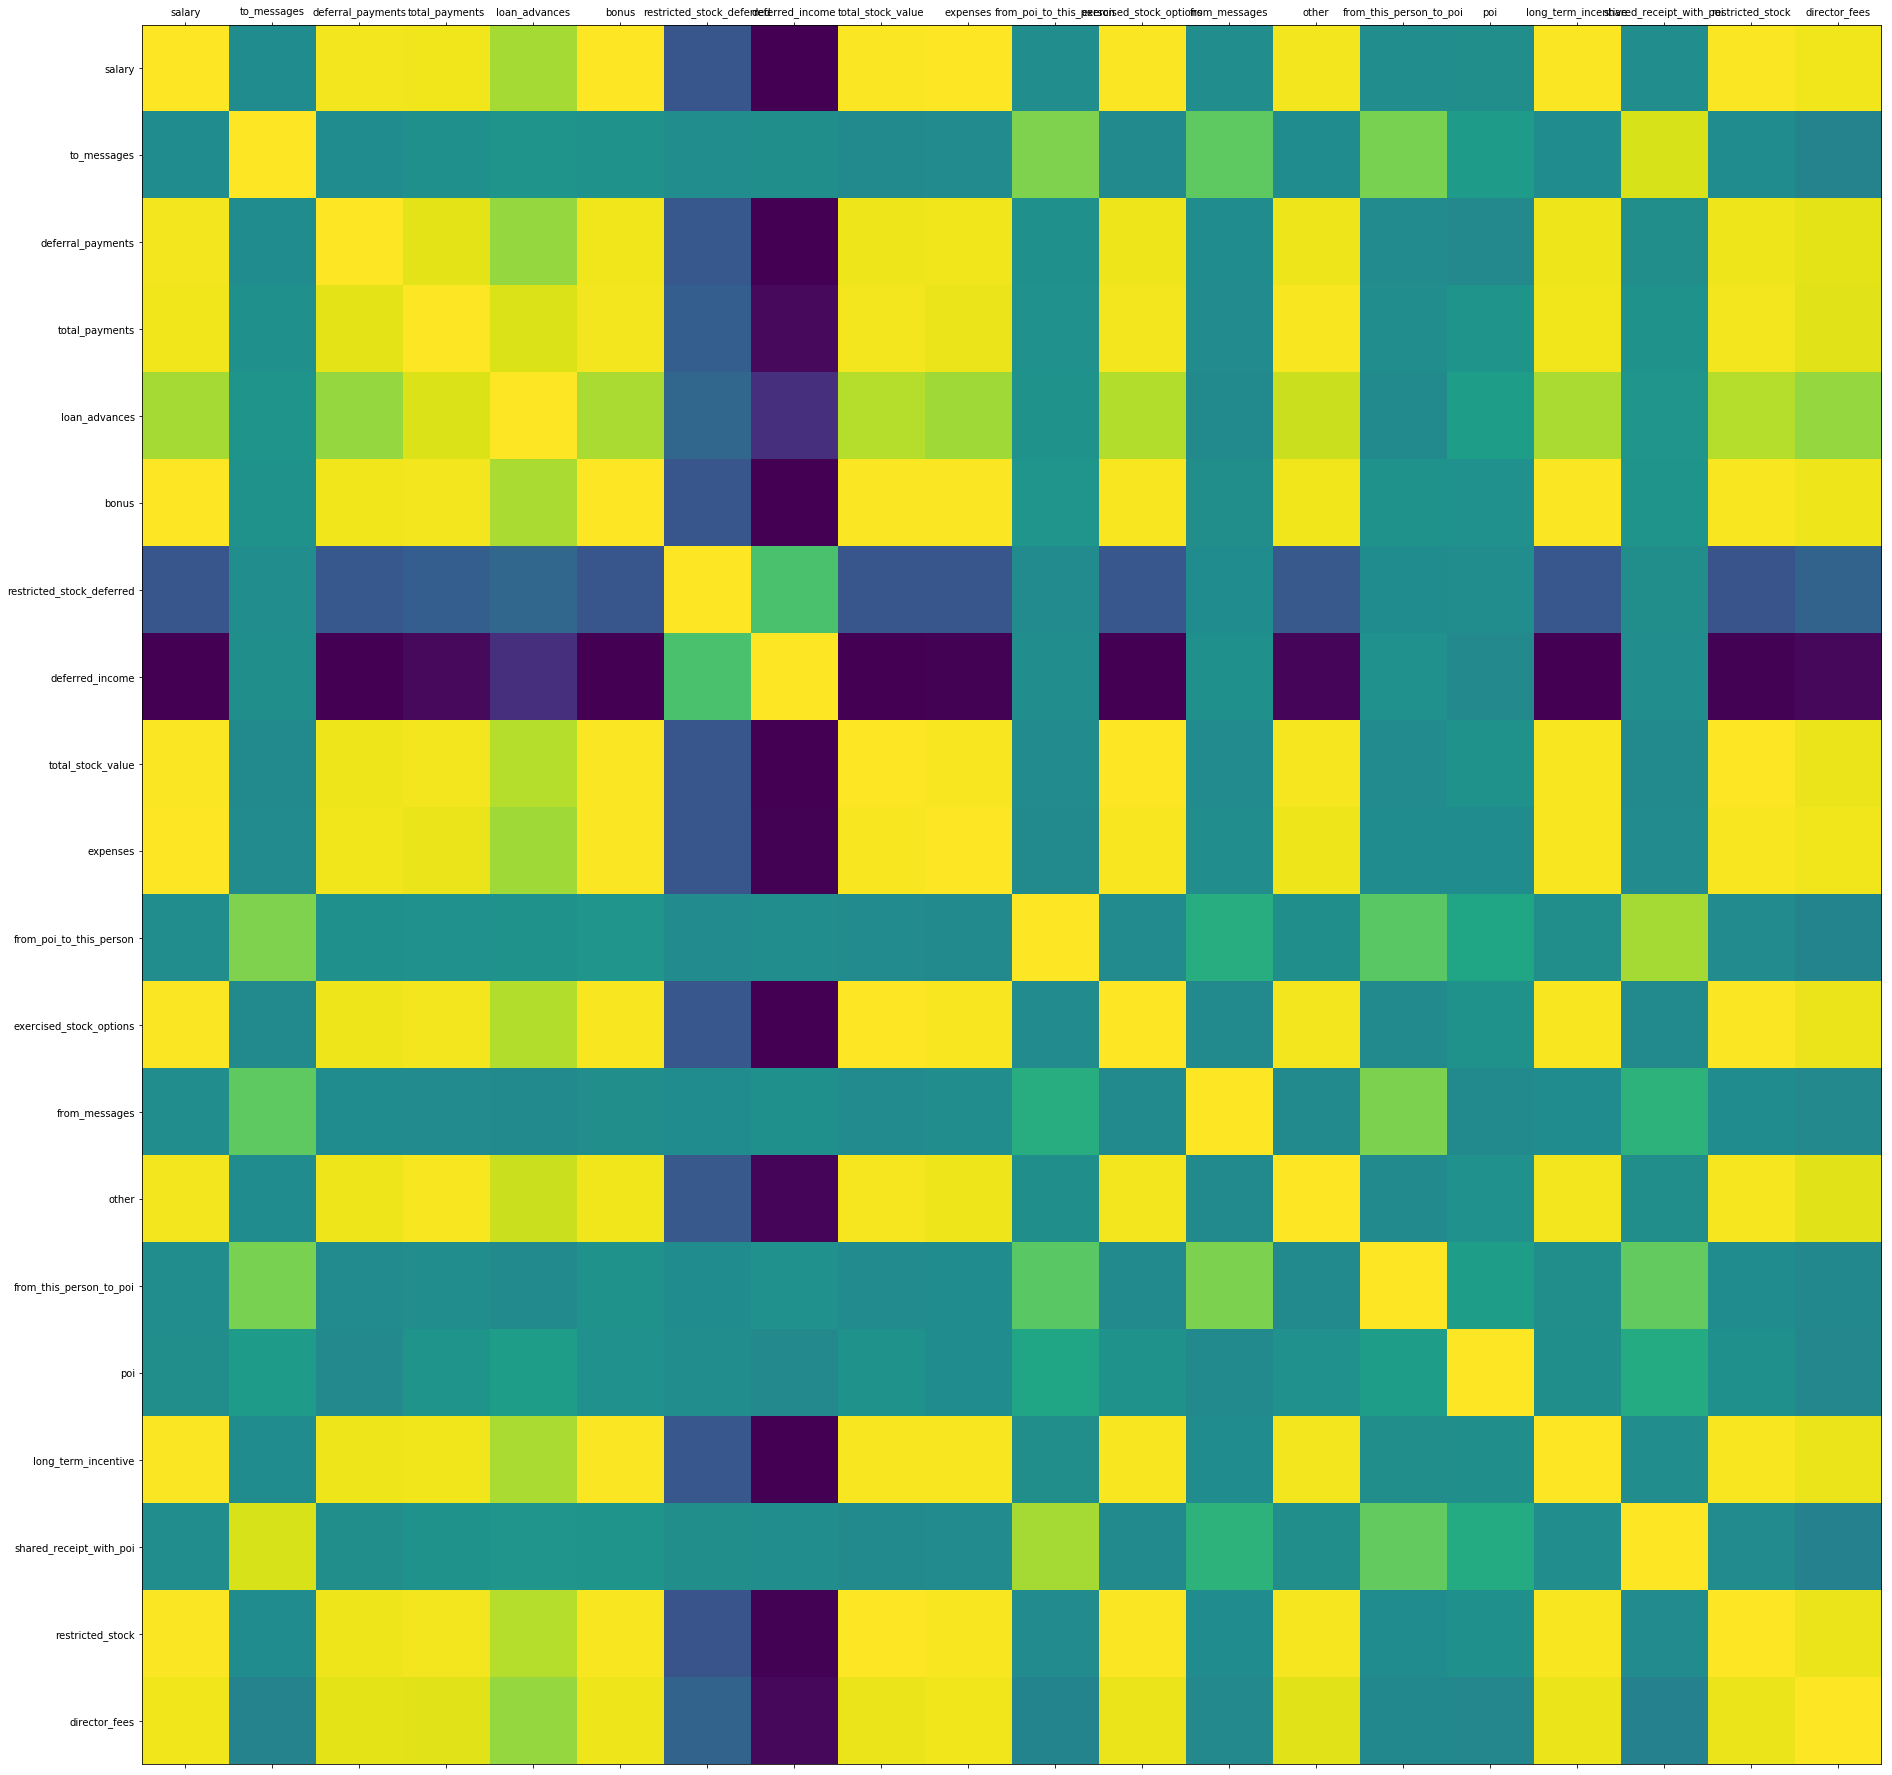

In [67]:
plot_corr(df)

In [68]:
df.corr()


,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
salary,1.000000,-0.010072,0.964071,0.956377,0.736118,0.993311,-0.445035,-0.971052,0.989487,0.993987,-0.006525,0.986588,-0.007720,0.963279,-0.006883,-0.000627,0.990172,-0.007904,0.987884,0.954495
to_messages,-0.010072,1.000000,-0.009674,0.021411,0.048216,0.033653,-0.004478,0.013093,-0.024683,-0.019884,0.619994,-0.028980,0.508814,-0.011148,0.605984,0.111262,-0.012271,0.882062,-0.015275,-0.087941
deferral_payments,0.964071,-0.009674,1.000000,0.921956,0.690475,0.958109,-0.430441,-0.968219,0.953548,0.956175,0.018061,0.951663,-0.011847,0.946820,-0.023737,-0.040409,0.953708,0.005959,0.950035,0.921844
total_payments,0.956377,0.021411,0.921956,1.000000,0.895696,0.962047,-0.378268,-0.923117,0.968211,0.945324,0.029830,0.965087,-0.016513,0.982825,-0.003704,0.049777,0.960403,0.032152,0.965398,0.910305
loan_advances,0.736118,0.048216,0.690475,0.895696,1.000000,0.752378,-0.317392,-0.696084,0.779217,0.719834,0.039634,0.775399,-0.028359,0.842761,-0.024885,0.131789,0.752040,0.057611,0.777374,0.685038
bonus,0.993311,0.033653,0.958109,0.962047,0.752378,1.000000,-0.440520,-0.969017,0.986016,0.987001,0.054515,0.983374,0.006055,0.959032,0.042789,0.023755,0.987034,0.047518,0.983447,0.947249
restricted_stock_deferred,-0.445035,-0.004478,-0.430441,-0.378268,-0.317392,-0.440520,1.000000,0.436274,-0.440206,-0.443637,-0.022683,-0.432673,-0.010899,-0.420780,-0.008651,-0.005362,-0.439292,0.005202,-0.456229,-0.343280
deferred_income,-0.971052,0.013093,-0.968219,-0.923117,-0.696084,-0.969017,0.436274,1.000000,-0.963957,-0.963304,-0.007900,-0.963599,0.016164,-0.941805,0.023262,-0.039544,-0.966250,-0.008039,-0.956865,-0.928890
total_stock_value,0.989487,-0.024683,0.953548,0.968211,0.779217,0.986016,-0.440206,-0.963957,1.000000,0.982885,-0.018833,0.998794,-0.022204,0.971330,-0.021248,0.034462,0.983462,-0.026169,0.993060,0.944862
expenses,0.993987,-0.019884,0.956175,0.945324,0.719834,0.987001,-0.443637,-0.963304,0.982885,1.000000,-0.027190,0.980173,-0.004281,0.951529,-0.011225,-0.009456,0.982047,-0.023309,0.981115,0.956348


In [70]:
tf_map={True : 1, False: 0}
df['poi']= df['poi'].map(tf_map)

In [71]:
df.tail(5)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
WINOKUR JR. HERBERT S,0,0,0,84992,0,0,0,0,-25000,0,...,0,0,0,0,0,0,0,0,0,108579
WODRASKA JOHN,0,0,0,189583,0,0,john.wodraska@enron.com,0,0,0,...,0,0,0,189583,0,0,0,0,0,0
WROBEL BRUCE,0,0,0,0,0,0,0,0,0,139130,...,0,139130,0,0,0,0,0,0,0,0
YEAGER F SCOTT,158403,0,0,360300,0,0,scott.yeager@enron.com,0,0,11884758,...,0,8308552,0,147950,0,1,0,0,3576206,0
YEAP SOON,0,0,0,55097,0,0,0,0,0,192758,...,0,192758,0,0,0,0,0,0,0,0


In [1]:
# %load ./SourceFiles/ud120-projects/tools/feature_format.py
#!/usr/bin/python

""" 
    A general tool for converting data from the
    dictionary format to an (n x k) python list that's 
    ready for training an sklearn algorithm

    n--no. of key-value pairs in dictonary
    k--no. of features being extracted

    dictionary keys are names of persons in dataset
    dictionary values are dictionaries, where each
        key-value pair in the dict is the name
        of a feature, and its value for that person

    In addition to converting a dictionary to a numpy 
    array, you may want to separate the labels from the
    features--this is what targetFeatureSplit is for

    so, if you want to have the poi label as the target,
    and the features you want to use are the person's
    salary and bonus, here's what you would do:

    feature_list = ["poi", "salary", "bonus"] 
    data_array = featureFormat( data_dictionary, feature_list )
    label, features = targetFeatureSplit(data_array)

    the line above (targetFeatureSplit) assumes that the
    label is the _first_ item in feature_list--very important
    that poi is listed first!
"""


import numpy as np

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    """ convert dictionary to numpy array of features
        remove_NaN = True will convert "NaN" string to 0.0
        remove_all_zeroes = True will omit any data points for which
            all the features you seek are 0.0
        remove_any_zeroes = True will omit any data points for which
            any of the features you seek are 0.0
        sort_keys = True sorts keys by alphabetical order. Setting the value as
            a string opens the corresponding pickle file with a preset key
            order (this is used for Python 3 compatibility, and sort_keys
            should be left as False for the course mini-projects).
        NOTE: first feature is assumed to be 'poi' and is not checked for
            removal for zero or missing values.
    """


    return_list = []

    # Key order - first branch is for Python 3 compatibility on mini-projects,
    # second branch is for compatibility on final project.
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)


def targetFeatureSplit( data ):
    """ 
        given a numpy array like the one returned from
        featureFormat, separate out the first feature
        and put it into its own list (this should be the 
        quantity you want to predict)

        return targets and features as separate lists

        (sklearn can generally handle both lists and numpy arrays as 
        input formats when training/predicting)
    """

    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features






In [2]:
def unixifyPickle(original, destination):
    content = ''
    outsize = 0
    with open(original, 'rb') as infile:
        content = infile.read()
    with open(destination, 'wb') as output:
        for line in content.splitlines():
            outsize += len(line) + 1
            output.write(line + str.encode('\n'))

    print("Done. Saved %s bytes." % (len(content)-outsize))

Done. Saved 6705 bytes.
Done. Saved 286 bytes.
8000000.0


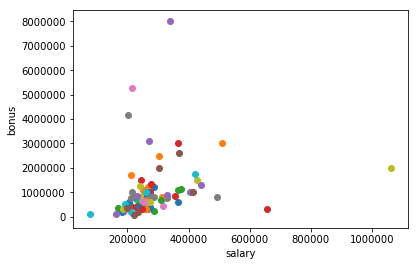

In [25]:
original = "./SourceFiles/ud120-projects/final_project/final_project_dataset.pkl"
destination = "./SourceFiles/ud120-projects/final_project/final_project_dataset_unix.pkl"
unixifyPickle(original, destination)

original_keys = "./SourceFiles/ud120-projects/tools/python2_lesson06_keys.pkl"
destination_keys = "./SourceFiles/ud120-projects/tools/python2_lesson06_keys_unix.pkl"
unixifyPickle(original_keys, destination_keys)



import pickle

dictionary = pickle.load( open(destination, "rb") )
dictionary.pop('TOTAL',0)
### list the features you want to look at--first item in the 
### list will be the "target" feature
features = ["salary", "bonus"]
data = featureFormat( dictionary, features, remove_any_zeroes=True,sort_keys = destination_keys)

### your code below
print(data.max())
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()


In [32]:
outliers = []
for key in dictionary:
    val = dictionary[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key,int(val)))

print(sorted(outliers,key=lambda x:x[1],reverse=True)[:4])

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037)]
